In [1]:
# Importing the libraries
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print("Training Images: {}".format(X_train.shape))
print("Testing Images: {}".format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


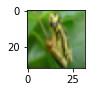

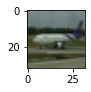

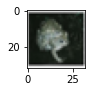

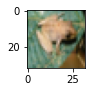

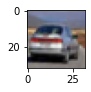

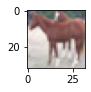

In [5]:
for i in range(232,238):
    plt.subplot(120+1+i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [6]:
# Data Pre-Processing
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
n_classes = 10

In [7]:
print("Shape before hot encoding ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after hot encoding ", y_train.shape)

Shape before hot encoding  (50000, 1)
Shape after hot encoding  (50000, 10)


In [8]:
# Building the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#Convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#Hidden Layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

#Output Layer
model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

#training the model
model.fit(X_train, y_train, batch_size = 120, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
417/417 [==============================] - 288s 691ms/step - loss: 1.5164 - accuracy: 0.4475 - val_loss: 1.1864 - val_accuracy: 0.5805
Epoch 2/20
417/417 [==============================] - 323s 775ms/step - loss: 1.1113 - accuracy: 0.6072 - val_loss: 1.0016 - val_accuracy: 0.6459
Epoch 3/20
417/417 [==============================] - 331s 794ms/step - loss: 0.9476 - accuracy: 0.6661 - val_loss: 0.9307 - val_accuracy: 0.6755
Epoch 4/20
417/417 [==============================] - 346s 830ms/step - loss: 0.8328 - accuracy: 0.7108 - val_loss: 0.8672 - val_accuracy: 0.6962
Epoch 5/20
417/417 [==============================] - 310s 743ms/step - loss: 0.7363 - accuracy: 0.7437 - val_loss: 0.8308 - val_accuracy: 0.7150
Epoch 6/20
417/417 [==============================] - 297s 712ms/step - loss: 0.6408 - accuracy: 0.7750 - val_loss: 0.8389 - val_accuracy: 0.7187
Epoch 7/20
417/417 [==============================] - 297s 713ms/step - loss: 0.5559 - accuracy: 0.8040 - val_loss: 0.8656 -

In [10]:
classes = range(0, 10)
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Zip names and classes to make a dictionary of class labels
class_labels = dict(zip(classes, names))

#Generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(y_test[100:109], axis = -1)

#Make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 1ms/step


In [11]:
print(predictions)

[[1.13516813e-04 1.61709850e-05 8.47917423e-03 1.70280188e-02
  8.56583953e-01 5.23936972e-02 1.74485822e-03 6.35086596e-02
  3.76555035e-05 9.43891719e-05]
 [6.79234872e-05 3.06002476e-05 4.38120216e-03 9.63442326e-02
  2.51047105e-01 3.01021308e-01 2.32193265e-02 3.23775023e-01
  9.45231077e-05 1.88089507e-05]
 [8.66558238e-08 3.65903674e-07 5.51908457e-08 7.19100490e-06
  1.06550878e-07 2.61834193e-05 9.99966025e-01 4.87058172e-09
  1.14336485e-09 1.37325007e-09]
 [5.40861947e-07 1.48805853e-07 1.08219705e-04 9.39635813e-01
  5.40327653e-03 2.42223279e-04 5.45569398e-02 1.35639248e-05
  4.92981781e-06 3.43616775e-05]
 [3.37466527e-10 9.99998331e-01 1.06394945e-21 1.85203219e-19
  4.05074950e-21 3.13002889e-24 5.26139757e-19 1.71359382e-20
  8.26447831e-07 8.54659618e-07]
 [2.62107449e-07 9.99984980e-01 9.14249162e-11 8.68718780e-13
  1.44072775e-12 1.09224441e-14 2.43352716e-11 4.34597860e-13
  1.37051175e-05 1.04452579e-06]
 [2.00032396e-03 9.76842712e-04 1.19152048e-03 1.25959888e

In [12]:
for image in predictions:
    print(np.sum(image))

1.0000001
1.0
1.0
1.0000001
1.0
1.0
1.0000001
1.0
1.0


In [13]:
class_result = np.argmax(predictions, axis = 1)
print(class_result)

[4 7 6 3 1 1 6 6 8]


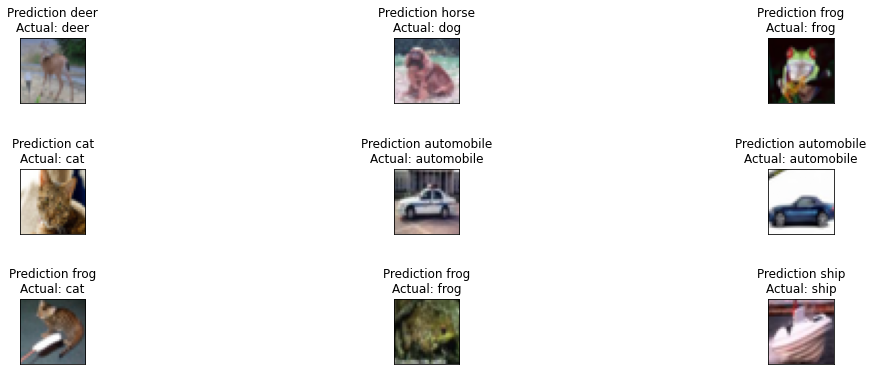

In [14]:
fig, axs = plt.subplots(3, 3, figsize = (19, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = "Prediction {}\nActual: {}".format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    #Plotting image
    axs[i].imshow(img)
    
#Show the plot
plt.show()